# Full Flux Reconstruction Comparison
As the title suggests, this notebook serves to compare the accuracy with which the mesh tally of the surface fluxes can be reconstructed by a functional expansion

In [1]:
from pincell_moment_utils import postprocessing as pp
from pincell_moment_utils.plotting import reconstruction_comparison
import matplotlib.pyplot as plt
import numpy as np

# First extract the surface fluxes from the tallies, then use them to compute the moments of the expansion 
mesh_tally = pp.SurfaceMeshTally('../data/source_statepoint.100.h5')
coefficients = pp.compute_coefficients(mesh_tally, 12, 12, expansion_type='bernstein_bernstein')

Define a surface expansion object and compute the expansion on a grid for the purpose of comparing to the original mesh tally

In [2]:
expansion = pp.surface_expansion(coefficients, mesh_tally.energy_filters, expansion_type='bernstein_bernstein')
space_vals, angle_vals, energy_vals = mesh_tally.meshes[0]
expansion_vals = expansion.evaluate_on_grid(0, (space_vals, angle_vals, energy_vals))

## 1D Comparisons
Selected comparisons of flux distributions along different surfaces and slices 

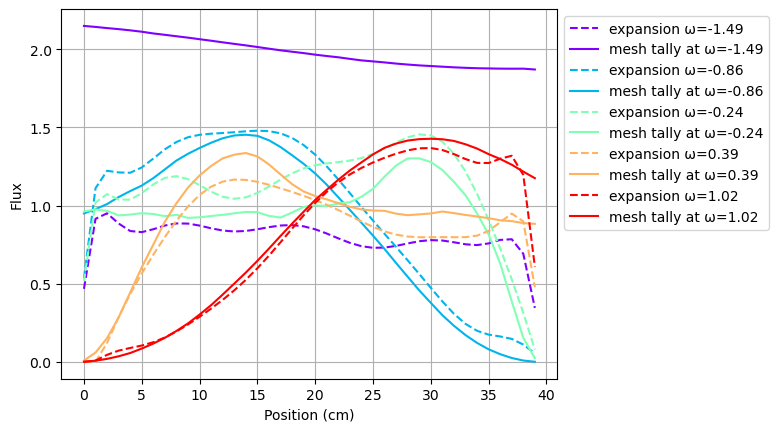

In [3]:
n_step = 4
n_colors = len(range(0, len(angle_vals), n_step))  # Ensure we generate enough colors
colors = plt.cm.rainbow(np.linspace(0, 1, n_colors))  # Match number of colors to loop steps

for i, index in enumerate(range(0, len(angle_vals), n_step)):
    plt.plot(expansion_vals[:, index, 0], color=colors[i], linestyle='dashed', label=f'expansion ω={angle_vals[index]:1.2f}')
    plt.plot(mesh_tally.fluxes[0][:, index, 0], color=colors[i], label=f'mesh tally at ω={angle_vals[index]:1.2f}')

plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Position (cm)')
plt.ylabel('Flux')
plt.show()


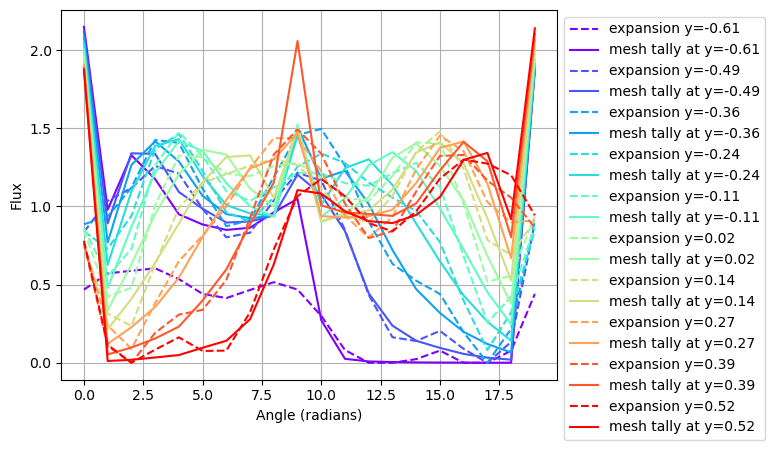

In [4]:
n_step = 4
n_colors = len(range(0, len(space_vals), n_step))  # Ensure we generate enough colors
colors = plt.cm.rainbow(np.linspace(0, 1, n_colors))  # Match number of colors to loop steps

for i, index in enumerate(range(0, len(space_vals), n_step)):
    plt.plot(expansion_vals[index, :, 0], color=colors[i], linestyle='dashed', label=f'expansion y={space_vals[index]:1.2f}')
    plt.plot(mesh_tally.fluxes[0][index, :, 0], color=colors[i], label=f'mesh tally at y={space_vals[index]:1.2f}')

plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Angle (radians)')
plt.ylabel('Flux')
plt.show()


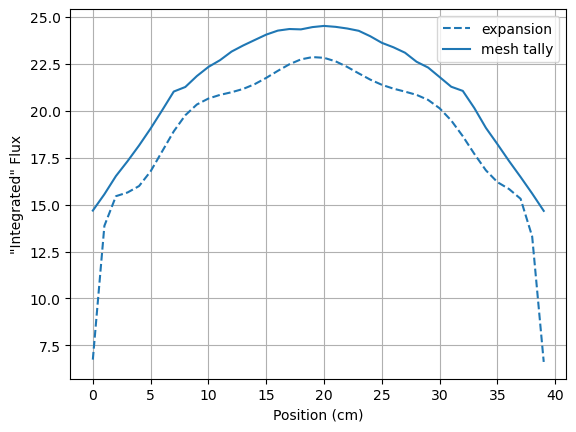

In [5]:
plt.plot(np.sum(expansion_vals, (1,2)), linestyle='dashed', color='tab:blue', label='expansion')
plt.plot(np.sum(mesh_tally.fluxes[0], (1,2)), color='tab:blue', label='mesh tally')
plt.xlabel('Position (cm)')
plt.ylabel('"Integrated" Flux')
plt.grid()
plt.legend()

## 2D Comparisons
Now plot a

[-1.49225651 -1.33517688 -1.17809725 -1.02101761 -0.86393798 -0.70685835
 -0.54977871 -0.39269908 -0.23561945 -0.07853982  0.07853982  0.23561945
  0.39269908  0.54977871  0.70685835  0.86393798  1.02101761  1.17809725
  1.33517688  1.49225651]


/home/mlouis9/shared/Educational Stuffs/Classes/Spring 2025/Stat ML/Project/data_generation/src/pincell_moment_utils/plotting.py:47: RuntimeWarning: divide by zero encountered in divide
  plot_vals =  np.abs(mesh_vals -expansion_vals)/mesh_vals
/home/mlouis9/shared/Educational Stuffs/Classes/Spring 2025/Stat ML/Project/data_generation/src/pincell_moment_utils/plotting.py:47: RuntimeWarning: invalid value encountered in divide
  plot_vals =  np.abs(mesh_vals -expansion_vals)/mesh_vals


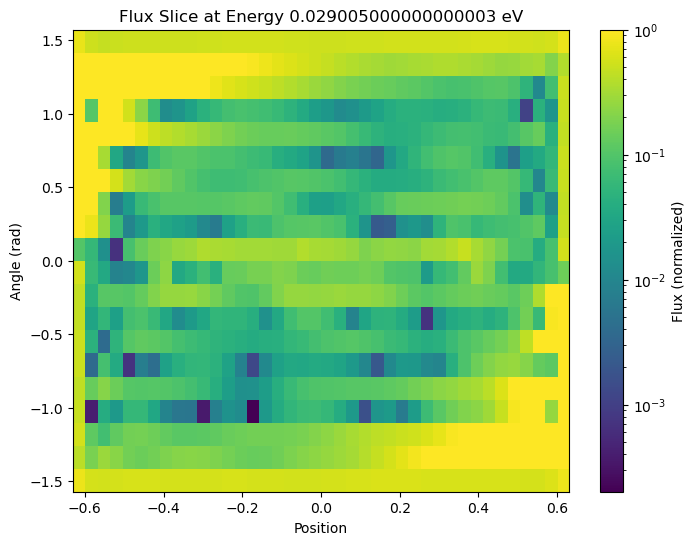

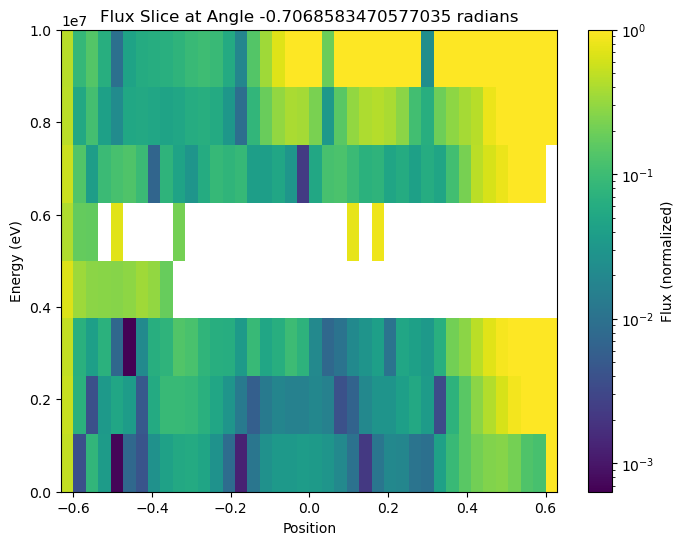

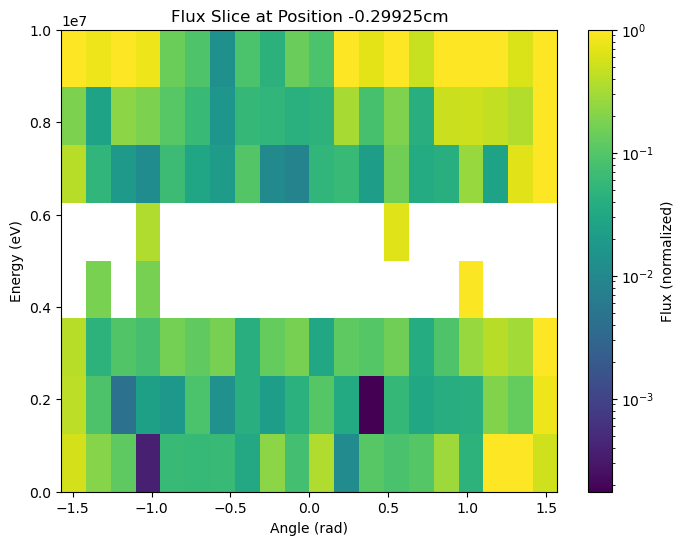

In [6]:
reconstruction_comparison(expansion, mesh_tally, 10, 5, 0, 0, option='relative_difference')

Although there are regions with a relative error close to 1, these are generally where the flux itself is statistically insignificant anyways, so this expansion is satisfactory, especially given how (relatively low) order it is.

It's roughly the same story for the other surfaces:

[1.64933614 1.80641578 1.96349541 2.12057504 2.27765467 2.43473431
 2.59181394 2.74889357 2.9059732  3.06305284 3.22013247 3.3772121
 3.53429174 3.69137137 3.848451   4.00553063 4.16261027 4.3196899
 4.47676953 4.63384916]


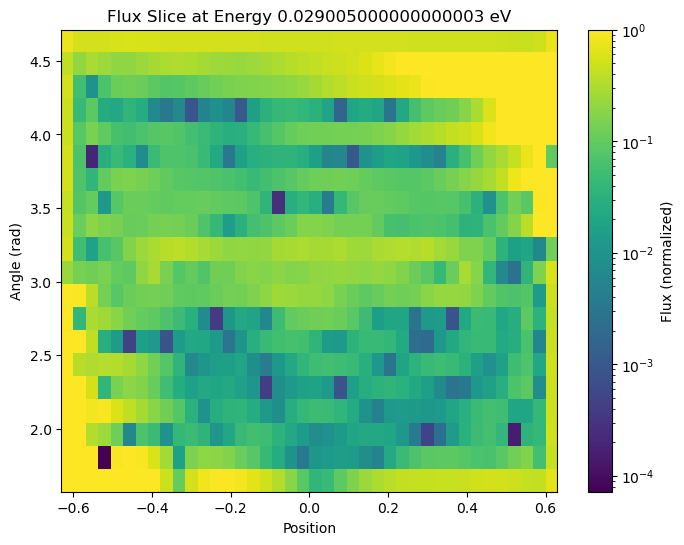

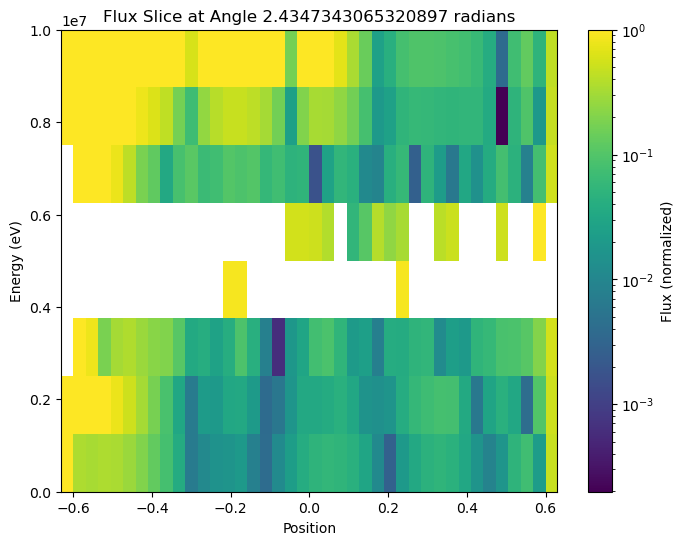

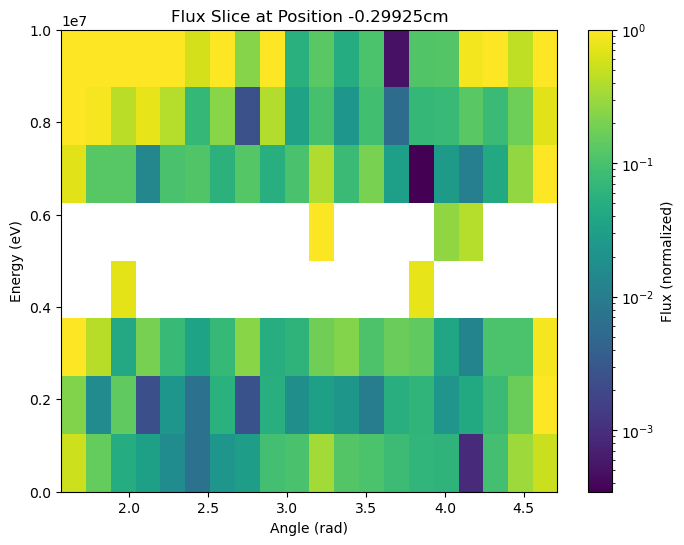

In [7]:
reconstruction_comparison(expansion, mesh_tally, 10, 5, 0, 1, option='relative_difference')

[0.07853982 0.23561945 0.39269908 0.54977871 0.70685835 0.86393798
 1.02101761 1.17809725 1.33517688 1.49225651 1.64933614 1.80641578
 1.96349541 2.12057504 2.27765467 2.43473431 2.59181394 2.74889357
 2.9059732  3.06305284]


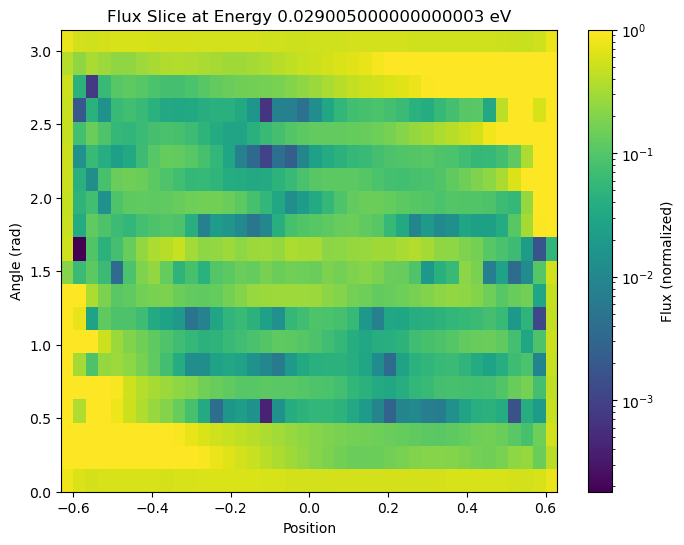

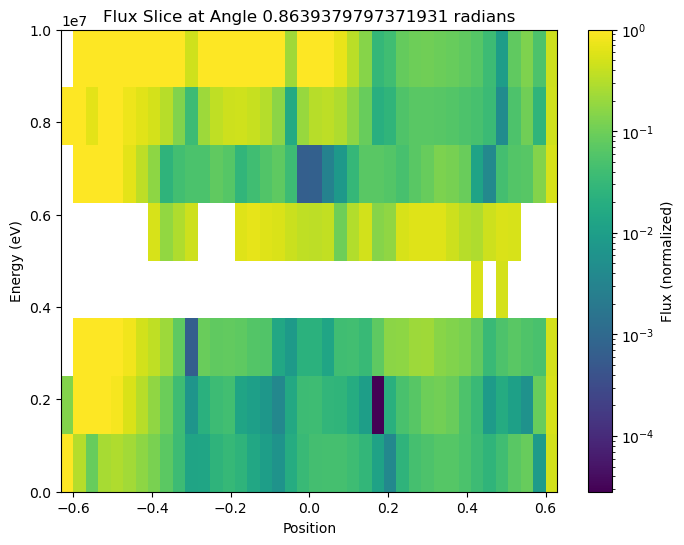

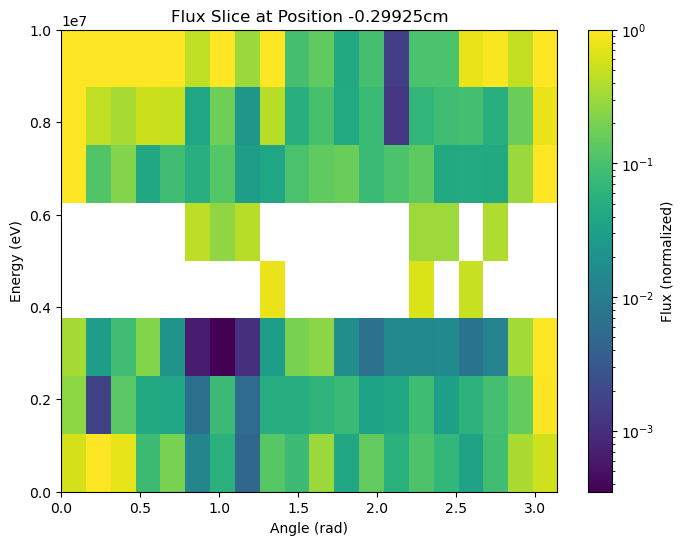

In [8]:
reconstruction_comparison(expansion, mesh_tally, 10, 5, 0, 2, option='relative_difference')

[-3.06305284 -2.9059732  -2.74889357 -2.59181394 -2.43473431 -2.27765467
 -2.12057504 -1.96349541 -1.80641578 -1.64933614 -1.49225651 -1.33517688
 -1.17809725 -1.02101761 -0.86393798 -0.70685835 -0.54977871 -0.39269908
 -0.23561945 -0.07853982]


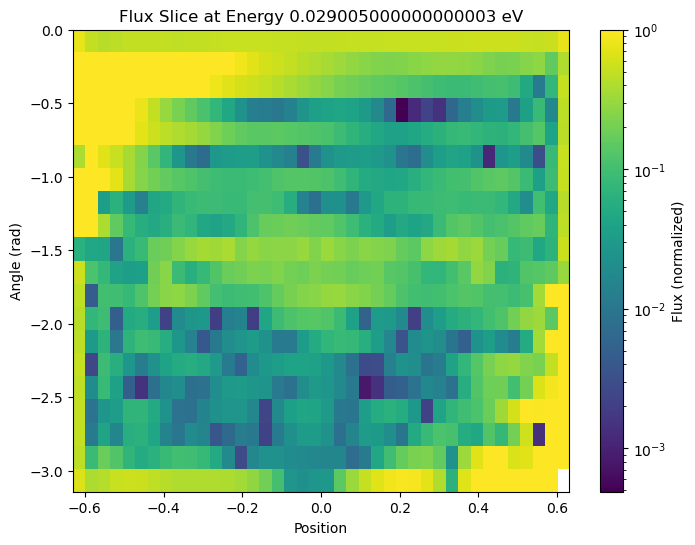

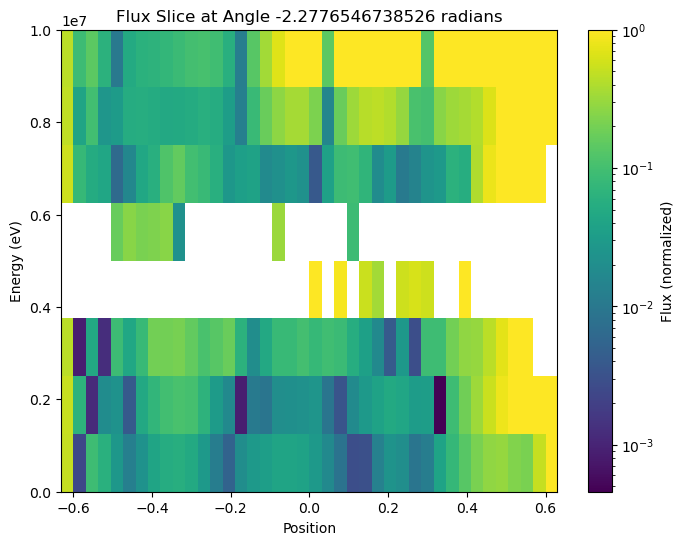

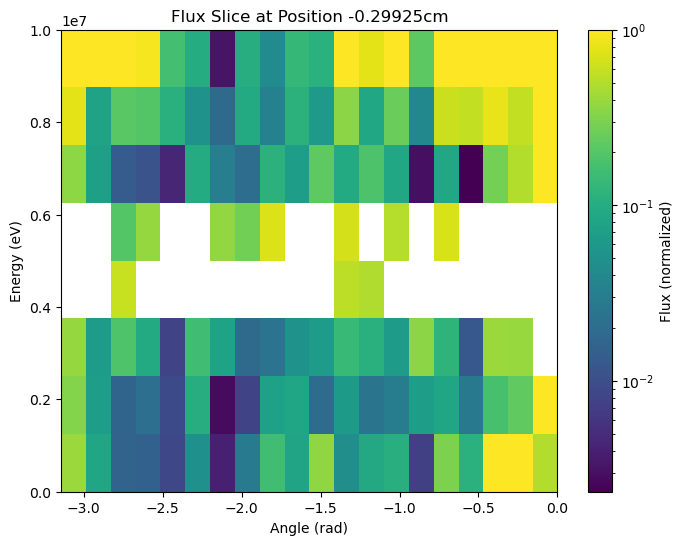

In [9]:
reconstruction_comparison(expansion, mesh_tally, 10, 5, 0, 3, option='relative_difference')